1 Ahmednagar
2 Alibag
3 Aurangabad
4 Beed
5 Chandrapur
6 Dhule
7 Hingoli
8 Jalgaon
9 Kolhapur
10 Latur
11 Nashik
12 Osmanabad
13 Parbhani
14 Pune
15 Ratnagiri
16 Sangli
17 Satara
18 Solapur
19 Wardha
20 Yavatmal
ASTAR =>  ['Jalgaon', 'Aurangabad', 'Beed', 'Parbhani', 'Hingoli', 'Yavatmal']


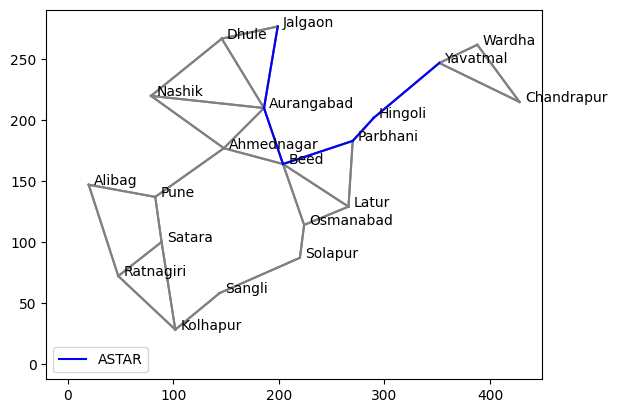

In [ ]:
import queue
import matplotlib.pyplot as plt

# getting heuristics from file
def getHeuristics():
    heuristics = {}
    f = open("/content/drive/MyDrive/AI mini/Maharashtra-problem-using-Astar-and-GBFS-main/heuristics.txt")
    for i in f.readlines():
        node_heuristic_val = i.split()
        heuristics[node_heuristic_val[0]] = int(node_heuristic_val[1])

    return heuristics


# getting cities location from file
def getCity():
    city = {}
    citiesCode = {}
    f = open("/content/drive/MyDrive/AI mini/Maharashtra-problem-using-Astar-and-GBFS-main/cities.txt")
    j = 1
    for i in f.readlines():
        node_city_val = i.split()
        city[node_city_val[0]] = [int(node_city_val[1]), int(node_city_val[2])]

        citiesCode[j] = node_city_val[0]
        j += 1

    return city, citiesCode


# creating cities graph from file
def createGraph():
    graph = {}
    file = open("/content/drive/MyDrive/AI mini/Maharashtra-problem-using-Astar-and-GBFS-main/citiesGraph.txt")
    for i in file.readlines():
        node_val = i.split()

        if node_val[0] in graph and node_val[1] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

        elif node_val[0] in graph:
            c = graph.get(node_val[0])
            c.append([node_val[1], node_val[2]])
            graph.update({node_val[0]: c})

            graph[node_val[1]] = [[node_val[0], node_val[2]]]

        elif node_val[1] in graph:
            c = graph.get(node_val[1])
            c.append([node_val[0], node_val[2]])
            graph.update({node_val[1]: c})

            graph[node_val[0]] = [[node_val[1], node_val[2]]]

        else:
            graph[node_val[0]] = [[node_val[1], node_val[2]]]
            graph[node_val[1]] = [[node_val[0], node_val[2]]]

    return graph

# Astar Algorithm
def Astar(startNode, heuristics, graph, goalNode="Yavatmal"):
    priorityQueue = queue.PriorityQueue()
    distance = 0
    path = []

    priorityQueue.put((heuristics[startNode] + distance, [startNode, 0]))

    while priorityQueue.empty() == False:
        current = priorityQueue.get()[1]
        path.append(current[0])
        distance += int(current[1])

        if current[0] == goalNode:
            break

        priorityQueue = queue.PriorityQueue()

        for i in graph[current[0]]:
            if i[0] not in path:
                priorityQueue.put((heuristics[i[0]] + int(i[1]) + distance, i))

    return path


# drawing map of answer
def drawMap(city, astar, graph):
    for i, j in city.items():
        plt.plot(j[0], j[1], "red")
        plt.annotate(i, (j[0] + 5, j[1]))

        for k in graph[i]:
            n = city[k[0]]
            plt.plot([j[0], n[0]], [j[1], n[1]], "gray")

    for i in range(len(astar)):
        try:
            first = city[astar[i]]
            secend = city[astar[i + 1]]

            plt.plot([first[0], secend[0]], [first[1], secend[1]], "blue")
        except:
            continue

    plt.errorbar(1, 1, label="ASTAR", color="blue")
    plt.legend(loc="lower left")

    plt.show()


# running the program
def main():
    heuristic = getHeuristics()
    graph = createGraph()
    city, citiesCode = getCity()

    for i, j in citiesCode.items():
        print(i, j)

    while True:
        inputCode = int(input("Please enter your desired city's number (0 for exit): "))

        if inputCode == 0:
            break

        cityName = citiesCode[inputCode]

        astar = Astar(cityName, heuristic, graph)
        print("ASTAR => ", astar)

        drawMap(city, astar, graph)


main()